# Part I - (Dataset Exploration Title)
## by Jakub J

## Introduction
Downloaded data is Ford GoBike System Data. According to inforation this data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('tripdata.csv')

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# delete rows that are empty
df = df[df['member_gender'].isnull() == False]
df = df[df['start_station_id'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
#check if there are duplicated rows
df.loc[df.duplicated(), :]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [8]:
#change from object to datetime

df['start_time'] = pd.to_datetime(df['start_time'], format = "%Y-%m-%d ")
df['end_time'] = pd.to_datetime(df['end_time'], format = "%Y-%m-%d ")

In [9]:
#extract day and month form start_time
df['month'] = df['start_time'].dt.strftime('%b')
df['day'] = df['start_time'].dt.strftime('%d')

In [10]:
#calculate age of user and change data type from object to integer
df['member_age'] = 2021 - df['member_birth_year']
df['member_age'] = df['member_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Univariate Exploration


### What is the structure of your dataset?

Downloaded file contains information like

duration_sec - for how long bike was rented

start_time - when bike was rented

end_time - when bike was returned 

start_station_id - id of station where bike was rented

start_station_name - name of of station where bike was rented

start_station_latitude - geographical feature of start station

start_station_longitude - geographical feature of start station

end_station_id - id of station where bike was returned

end_station_name - id of station where bike was returned

end_station_latitude - geographical feature of end station

end_station_longitude - geographical feature of end station

bike_id - id of bike that was rented	

user_type - information who was user that rented bike

member_birth_year - when user was born

member_gender - sex of user

bike_share_for_all_trip - information if bike was shared

Dataset contians 174952 records.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset are duration_sec, start_time, and user_type column.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In my opinion "user id" will help to support my investigation. I think I will also take a look at "user type". Also extracting month and day might be usefull. 

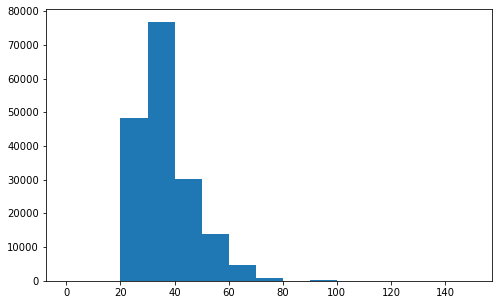

In [12]:
binsize = 10
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'member_age', bins=bins);

In [13]:
df['member_age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [14]:
#we see that maximum user age is 144 which seens to high. I'll remove users below 20yo and that have more than 80 years
df = df[df['member_age'] <= 80]
df = df[df['member_age'] >= 20]
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,28,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Feb,28,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Feb,28,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,28,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,28,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,Feb,01,25
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,Feb,01,37
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,Feb,01,31
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,Feb,01,33


In [15]:
df['member_age'].describe()

count    174749.000000
mean         36.122335
std           9.871342
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: member_age, dtype: float64

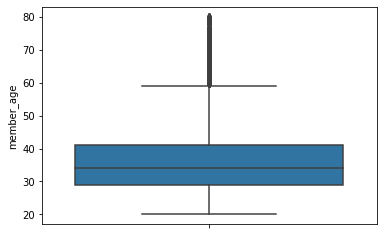

In [16]:
sb.boxplot(data = df, y = 'member_age');

In [17]:
#adding additional column with calculated trip per min
df['duration_min'] = df['duration_sec']/60
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174749 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174749 non-null  int64         
 1   start_time               174749 non-null  datetime64[ns]
 2   end_time                 174749 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  float64       
 4   start_station_name       174749 non-null  object        
 5   start_station_latitude   174749 non-null  float64       
 6   start_station_longitude  174749 non-null  float64       
 7   end_station_id           174749 non-null  float64       
 8   end_station_name         174749 non-null  object        
 9   end_station_latitude     174749 non-null  float64       
 10  end_station_longitude    174749 non-null  float64       
 11  bike_id                  174749 non-null  int64         
 12  user_type       

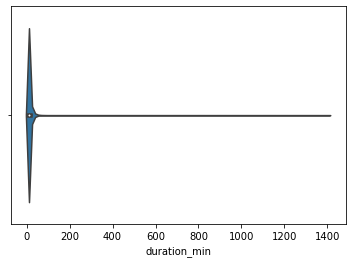

In [18]:
sb.violinplot(data = df, x = 'duration_min');

In [19]:
df['duration_min'].describe()

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
25%           5.383333
50%           8.516667
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [20]:
df['duration_min'].describe(percentiles=[.99])

count    174749.000000
mean         11.738343
std          27.384592
min           1.016667
50%           8.516667
99%          52.950667
max        1409.133333
Name: duration_min, dtype: float64

According to above table, 99% of the trips last less than 1 hour. 

As this hard to say if thoes above 60 min are resonable (or they might be tracking system issue), I'll remove records with duration above 60 min. 

In [21]:
df = df[df['duration_min'] <= 60]
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,member_age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,28,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,28,62,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Feb,28,38,19.116667
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,Feb,28,32,26.916667
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,Feb,28,33,26.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,Feb,01,25,8.000000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,Feb,01,37,5.216667
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,Feb,01,31,2.350000
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,Feb,01,33,2.316667


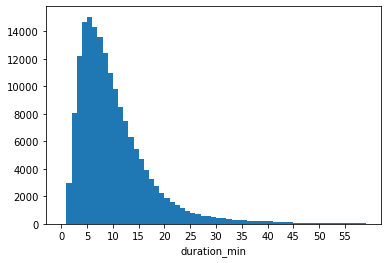

In [22]:
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('duration_min');

In [23]:
#Checking type of user
df.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

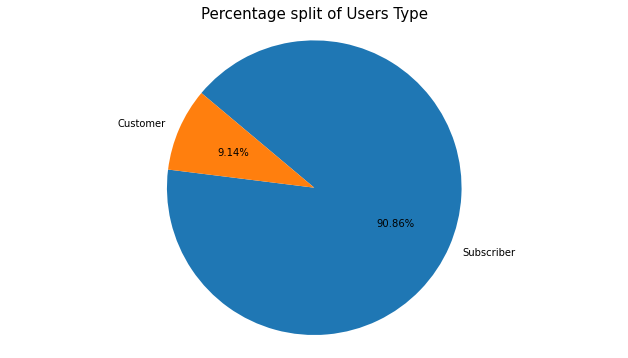

In [24]:
#user type by it's percentage

plt.figure(figsize=(11,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 140,
        counterclock = False, autopct='%1.2f%%');
plt.axis('equal')
plt.title('Percentage split of Users Type', fontsize=15);

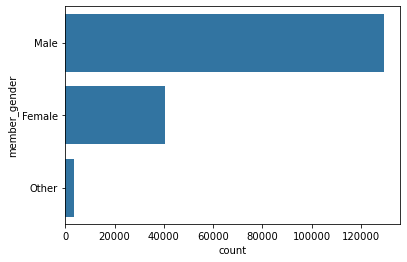

In [25]:
base_color = sb.color_palette()[0]
type_order = df['member_gender'].value_counts().index
sb.countplot(data=df, y='member_gender', color=base_color, order=type_order);



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

According to the data:
1. Most users were around 20 to 40 years old. 
2. Most of trips were rather short. Average of trip are around 12 min. Some receords showed trips above 24 hours.
3. Most users were subscribers (almost 91%). 
4. Most of the users are males.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During investigation following adjustments were made:
1. Removing rows with users above 80 years old, as this data seems be incorrect
2. Adding additional column with trip duration in minutes
3. Removing trips that lasted more than 1 hours (1% of total trips), as we cannot say if they are correct.


## Bivariate Exploration


#### What is connection between trip duration and gender?

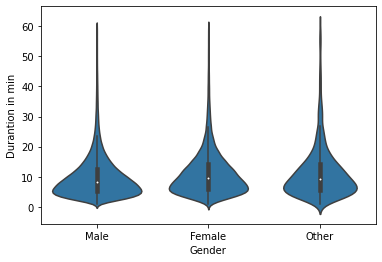

In [26]:
sb.violinplot(data=df, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Durantion in min');

There is no big difference between users. It is visible that malre users take slightly often short trips than other users.

#### What is connection between trip duration and type of user?

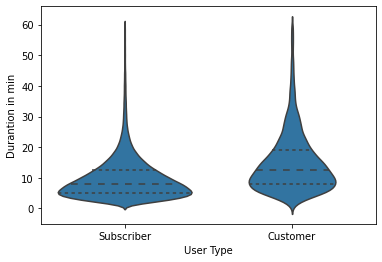

In [27]:
sb.violinplot(data=df, x='user_type', y='duration_min', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Durantion in min');


Base on above, we can see that subbscribers takes shorter tips. Customers have tendencies to rent the bikes for longer.





#### What is connection between trip duration and age?

Let's group age into intervals.

In [28]:

df['age_category'] = pd.cut(x=df['member_age'], bins=[20, 30, 40, 50, 60, 70, 80])
df.head(5)

#https://knowledge.udacity.com/questions/755551?utm_campaign=ret_600_auto_ndxxx_knowledge-answer-created_na&utm_source=blueshift&utm_medium=email&utm_content=ret_600_auto_ndxxx_knowledge-answer-created_na&bsft_clkid=fdeb9955-3ec9-446a-8da4-0a3524e9038b&bsft_uid=31912f79-df29-44a6-8fa0-a37e3a46e878&bsft_mid=90446107-6654-4233-a414-2e8552444262&bsft_eid=22b8f7b6-5eac-66ee-cf9f-0d5b86b9fddc&bsft_txnid=8d66b91d-bae5-45cc-9780-152023be907c&bsft_mime_type=html&bsft_ek=2021-12-02T20%3A16%3A38Z&bsft_aaid=8d7e276e-4a10-41b2-8868-423fe96dd6b2&bsft_lx=1&bsft_tv=1#755554

<ipython-input-28-dce51de43b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_category'] = pd.cut(x=df['member_age'], bins=[20, 30, 40, 50, 60, 70, 80])


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,member_age,duration_min,age_category
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Feb,28,47,26.416667,"(40, 50]"
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Feb,28,62,29.883333,"(60, 70]"
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,Feb,28,38,19.116667,"(30, 40]"
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,Feb,28,32,26.916667,"(30, 40]"
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,Feb,28,33,26.166667,"(30, 40]"


In [29]:
df['age_category'].value_counts()

(30, 40]    72062
(20, 30]    56229
(40, 50]    27563
(50, 60]    12755
(60, 70]     4081
(70, 80]      644
Name: age_category, dtype: int64

In [30]:
df_share = df.groupby('age_category').agg({'bike_id':'count'})
df_share['percentage'] = (df_share['bike_id']/df_share['bike_id'].sum())*100
df_share

,bike_id,percentage
age_category,,
"(20, 30]",56229,32.439683
"(30, 40]",72062,41.574071
"(40, 50]",27563,15.901670
"(50, 60]",12755,7.358626
"(60, 70]",4081,2.354414
"(70, 80]",644,0.371537


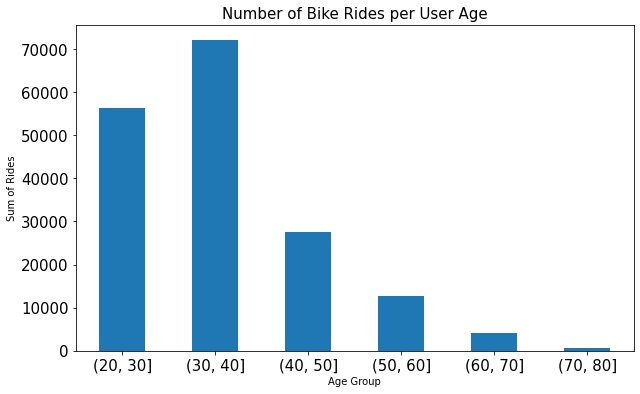

In [31]:
df_share.bike_id.plot(kind='bar', figsize=(10,6),fontsize =15, color=base_color)

plt.xticks(rotation=0)
ax = plt.gca()
ax.set_ylabel('Sum of Rides')
ax.set_xlabel('Age Group')
ax.set_title("Number of Bike Rides per User Age", fontsize=15);

Most often, bikes are rented by Users in age (20,30> and (30,40>

#### What is percentage share of trip duration by age?

In [32]:
df_share = df.groupby('age_category').agg({'bike_id':'count'})
df_share['percentage'] = (df_share['bike_id']/df_share['bike_id'].sum())*100
df_share

,bike_id,percentage
age_category,,
"(20, 30]",56229,32.439683
"(30, 40]",72062,41.574071
"(40, 50]",27563,15.901670
"(50, 60]",12755,7.358626
"(60, 70]",4081,2.354414
"(70, 80]",644,0.371537


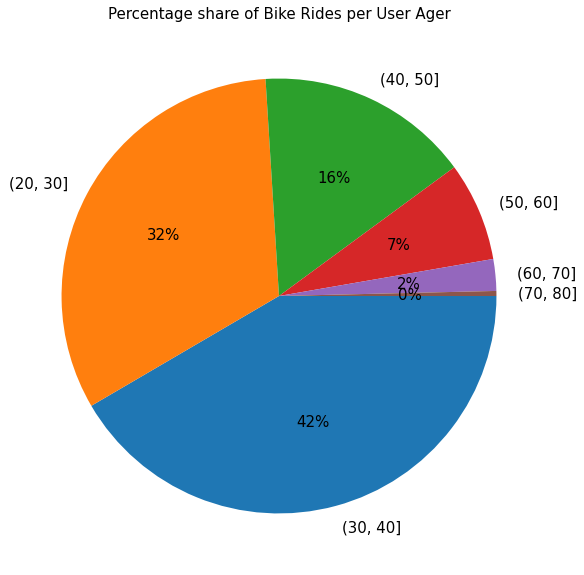

In [33]:

df.age_category.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15,counterclock = False, autopct='%1.0f%%')
ax = plt.gca()
ax.set_ylabel('')
ax.set_title("Percentage share of Bike Rides per User Ager", fontsize=15);

Both categories (20,30> and (40,50> have total share 74%

#### What is connection between trip duration and age?


In [34]:
age_aggr = df.groupby('age_category').duration_min.sum()
age_aggr

age_category
(20, 30]    575722.216667
(30, 40]    736924.933333
(40, 50]    281586.666667
(50, 60]    137135.333333
(60, 70]     48904.533333
(70, 80]      6670.883333
Name: duration_min, dtype: float64

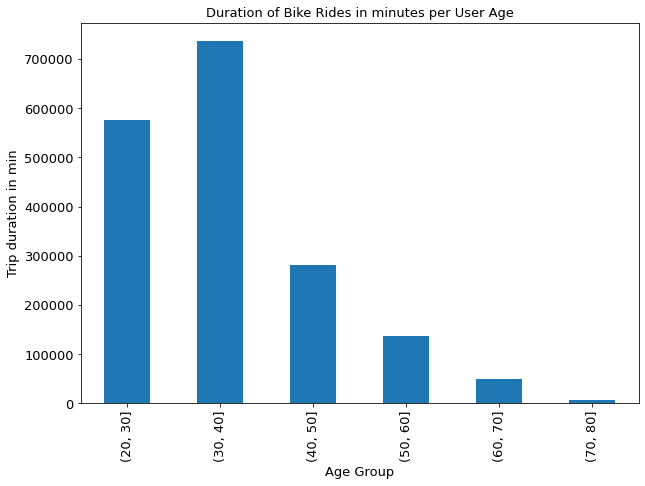

In [35]:
g_bar = age_aggr.plot.bar(color = base_color, fontsize = 13)

g_bar.figure.set_size_inches(10, 7);

plt.title('Duration of Bike Rides in minutes per User Age', color = 'black', fontsize = '13')
plt.xlabel('Age Group', color = 'black', fontsize = '13')
plt.ylabel('Trip duration in min', color = 'black', fontsize = '13');

As we could expected, based on preious "Number of Bike Rides per User Age" plots, the longest tips in total are taken by users in group(30,40> and (20,30>.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

According to investigation, we can say that both men and women prefer to take shorter trips. 

If we take into conisderation number of trips and time of trips leading age of user wolud be between 31 and 40. Next in this category are users in age 21 to 30.

Base on this we can assume that common user is either male or female between age 21-40 and such user prefer to take rather short trips. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I didn't notice anything interesting, but I was suprised that duration of trips fell so significantly for group age (40,50>.

## Multivariate Exploration


#### What is most popular user gender is specific age group?

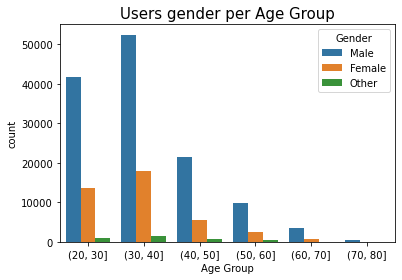

In [36]:
ax = sb.countplot(x='age_category', hue='member_gender', 
                   data=df.sort_values(by=['age_category']))

ax = plt.gca()
ax.legend().set_title('Gender')
ax.set_ylabel('count')
ax.set_xlabel('Age Group')
plt.title('Users gender per Age Group', fontsize=15);

We can notice that in all groups of ages, males are most common type of user. Number of male users are siginicantly bigger than female users. 

#### How can be described most popular user of bike share system?

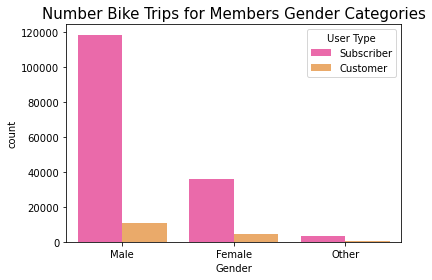

In [37]:
sb.countplot(data=df, x='member_gender', hue='user_type', color=base_color, palette='spring')

ax = plt.gca()
ax.legend().set_title('User Type')
ax.set_ylabel('count')
ax.set_xlabel('Gender')
ax.set_title("Number Bike Trips for Members Gender Categories", fontsize=15);

Based on above, we can say that most common users are males and thet are subscribers. Second position belongs to subscribers that are females.

#### How can be described users of bike share system and time of their trips?

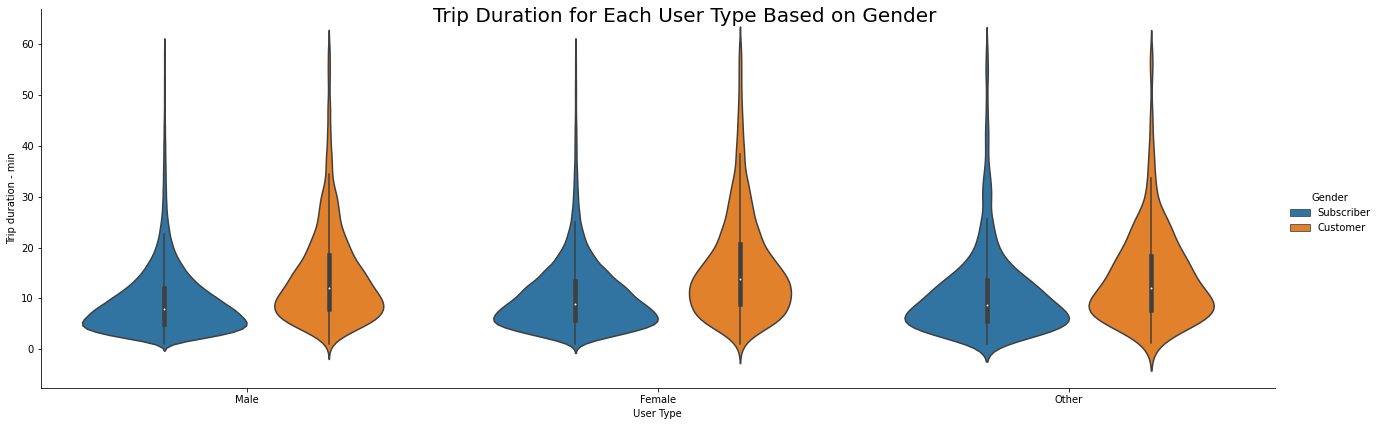

In [38]:
ax = sb.catplot(data=df, x='member_gender', y="duration_min", hue="user_type", kind="violin", height=6, aspect=3)

ax.set_axis_labels("User Type", "Trip duration - min")
ax._legend.set_title('Gender')
ax.fig.suptitle('Trip Duration for Each User Type Based on Gender', fontsize=20);

We can see the customer users in all genders have higher duration than subscriber users.

#### What is the split of time trip per type of user and day?

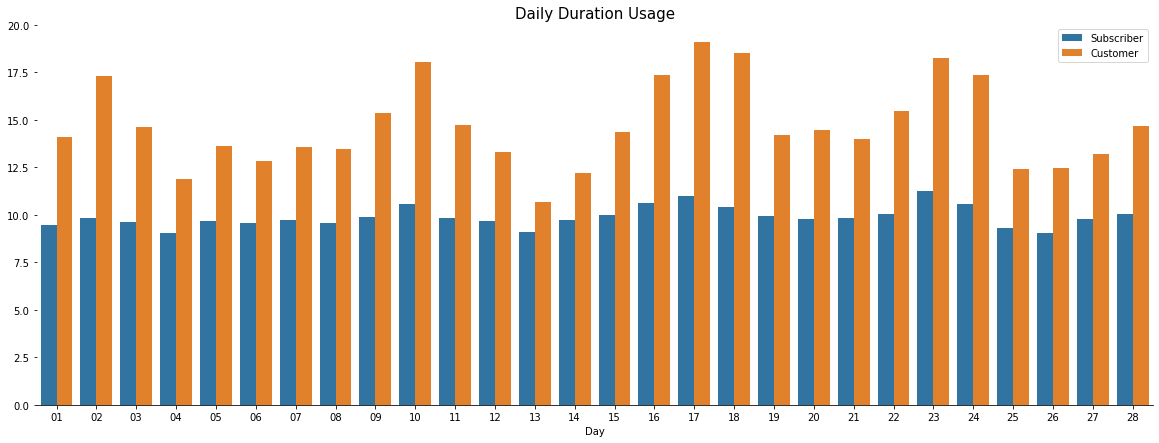

In [39]:
plt.figure(figsize=(20,7))
plt.title('Daily Duration Usage', fontsize=15)
chart = sb.barplot(data=df, x='day', y='duration_min', hue='user_type', ci=None)

chart.set(xlabel='Day', ylabel='')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

We see that in all days customers took longer trips than subscribers.

As project is finished, I'll save clear data into new .csv file.

In [42]:
df['age_category'].value_counts()

(30, 40]    72062
(20, 30]    56229
(40, 50]    27563
(50, 60]    12755
(60, 70]     4081
(70, 80]      644
Name: age_category, dtype: int64

In [40]:
df.to_csv('tripdata-final.csv', index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We can notice that most common user of bike system are males that are subscribers. When we take into consideration duration of the trips, custommers are leading. It might be result that subscribers uses bike system to regular and rather short trips. For exaple they might use bikes as alternative for public transpor during travel to work. Customers seems to use bike system due to differen reasons. Additional in investigated data, there are no days that subscribers took longer trips than customers.


### Were there any interesting or surprising interactions between features?

I expectd the trip duration for subscriber users will be higher than for customer users.

## Conclusions

If we would like to define common user of bike system, this would be male that is subscriber and prefer to take short trips (around 10min). Bike for him might be alternative means of transport to work.

In the other hand longest trip are taken by common users. Such users leads in time spend on bike and it doesn't matter if this is "working" day or weekend.
